# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


/tmp/ipykernel_3655/2215061726.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
class SimpleRegressionModel():
    def __init__(self, learningRate, numofepochs):
        self.learningRate = learningRate
        self.numofepochs = numofepochs
        self.lossfun = nn.MSELoss()
        self.net = nn.Sequential(
            nn.Linear(1, 1),  # input layer
            nn.ReLU(),       # activation function
            nn.Linear(1, 1)   # output layer
        )
        self.optimizer = torch.optim.Adam(
            self.net.parameters(), lr=self.learningRate)
        self.losses = torch.zeros(self.numofepochs)
    def train(self, x, y):
        # Train the model!
        # loss = THRESHOLD
        # epochi = 0
        # while loss >= THRESHOLD and epochi < NUMOFEPOCHS:
        for epochi in range(self.numofepochs):
            # forward pass
            yHat = self.net(x)

            # compute loss
            loss = self.lossfun(yHat, y)
            self.losses[epochi] = loss

            # backprop
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            # epochi+=1
        self.losses = self.losses[:epochi]
    def eval(self, x, y):
        preds = self.net(x)
        return preds, self.lossfun(preds, y)


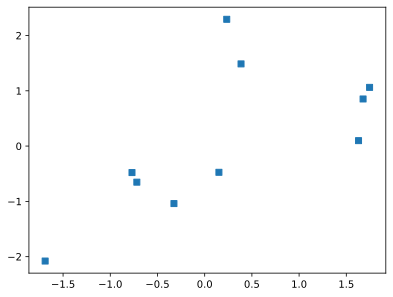

In [8]:
# create data
N = 10
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# learning rate
learningRate = .05

# THRESHOLD = .1
NUMOFEPOCHS = 500
REPEAT = 50

# and plot
plt.plot(x, y, 's')
plt.show()

In [3]:
def test(N, noise, times = 1):
    x = torch.randn(N, 1)
    y = x + torch.randn(N, 1)*noise
    losses = torch.zeros(times)
    for lossIndex in range(times):
        simpleRegressionModel = SimpleRegressionModel(
            learningRate, NUMOFEPOCHS)
        simpleRegressionModel.train(x, y)
        _, testloss = simpleRegressionModel.eval(x, y)
        losses[lossIndex] = testloss.item()
    return losses

def testFor(Ns, noises):
    lossmeans = torch.zeros(len(Ns), len(noises))
    lossvars = torch.zeros(len(Ns), len(noises))

    for iN in range(len(Ns)):
        for jnoises in range(len(noises)):
            losses = test(Ns[iN], noises[jnoises], REPEAT)
            lossmeans[iN][jnoises] = losses.mean()
            lossvars[iN][jnoises] = losses.var()

    return lossmeans



In [ ]:
Ns = torch.arange(10, 51, 10)
noises = torch.linspace(.5, 2, 10)
lossmeans = testFor(Ns, noises)

In [9]:

losses = torch.zeros(REPEAT) 
for i in range(REPEAT):
    losses[i] = test(30,.5).item()

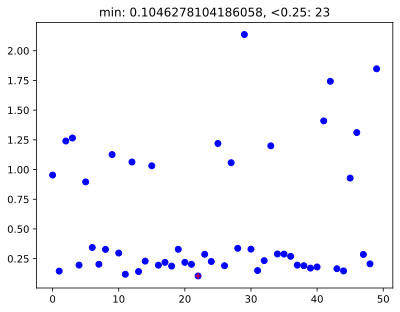

In [10]:
LIMIT = .25
plt.plot(losses, "bo")
minElem = losses.min()
plt.plot(losses.argmin(),losses.min(),"r+")

plt.title(f"min: {minElem}, <{LIMIT}: {torch.sum(losses < LIMIT)}")
plt.show()

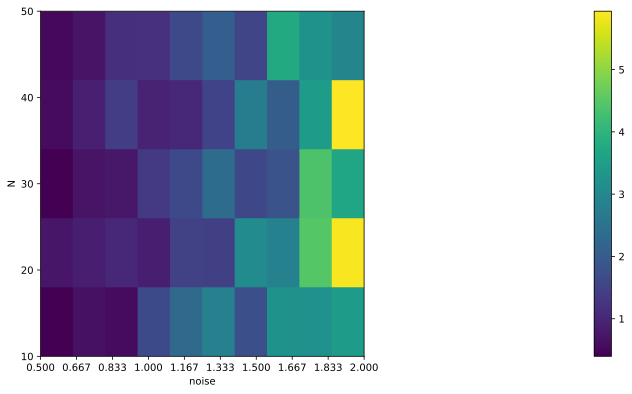

In [5]:
plt.axes([0, 0, 10, 1])
plt.imshow(lossmeans, extent=[noises[0], noises[-1],
           Ns[0], Ns[-1]], origin='lower', aspect=.04)
plt.colorbar()
plt.xlabel('noise')
plt.ylabel('N')
plt.xticks(noises)
plt.yticks(Ns)
plt.show()


In [7]:
from scipy import stats

t,p = stats.ttest_ind(lossmeans[0][0], lossmeans[1][0])

/tmp/ipykernel_114552/3176094344.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,p = stats.ttest_ind(lossmeans[0][0], lossmeans[1][0])
/home/polyester/.venv/datascience/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/polyester/.venv/datascience/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [8]:
print(lossmeans[0][0], lossmeans[1][0])

tensor(0.3968) tensor(0.7247)


# Additional explorations

In [6]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.
